<a href="https://colab.research.google.com/github/gogowonji/Machine-Learning-with-Python/blob/main/ch2_3_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [2]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

!pip install mglearn
import mglearn # github clone

Text(0, 0.5, '특성 1')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


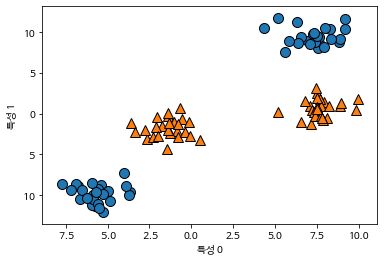

In [3]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

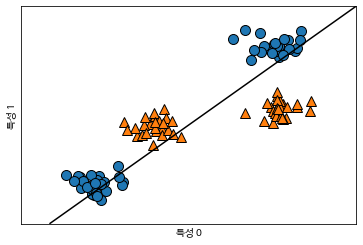

In [ ]:
from sklearn.svm import LinearSVC
# SVC 적용
linear_svm = LinearSVC(max_iter=5000, tol=1e-3).fit(X,y)

# 2차원 데이터셋 분할 평면 그리기 (분류기, X)
mglearn.plots.plot_2d_separator(linear_svm, X)
# 산점도
mglearn.discrete_scatter(X[:,0],X[:,1],y)

plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0.5, 0, '특성 1 ** 2')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


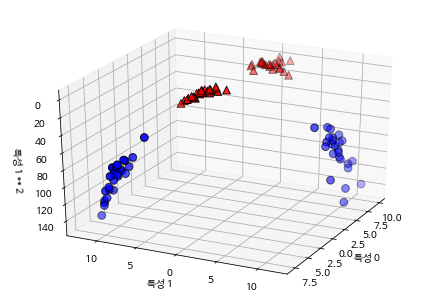

In [ ]:
# (두 번째 특성^2) 추가
X_new = np.hstack([X, X[:,1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

# 3차원 그래프
ax = Axes3D(figure, elev = -152, azim = -26)
# y == 0 인 포인트 그리고 -> y == 1인 포인트 그리기
mask = y == 0
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c = 'b',
           cmap = mglearn.cm2, s = 60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c = 'r',
           marker = '^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 1 ** 2")


Text(0.5, 0, '특성1**2')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


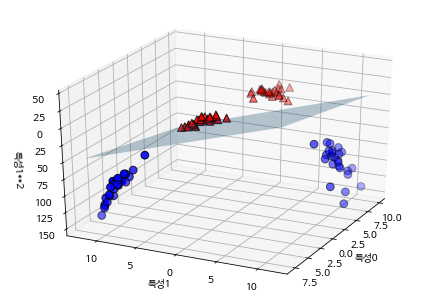

In [ ]:
# SVC 적용
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new,y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim= -26)

xx = np.linspace(X_new[:,0].min(), X_new[:,0].max(), 50)
yy = np.linspace(X_new[:,1].min(), X_new[:,1].max(), 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX +
      coef[1] * YY + 
      intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c = 'r',
           marker='^', cmap=mglearn.cm2, s = 60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1**2")

Text(0, 0.5, '특성 1')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


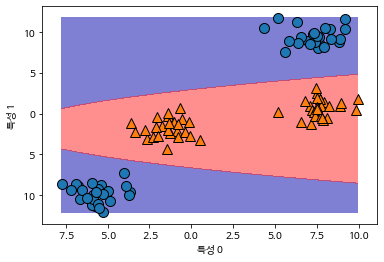

In [ ]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성1')

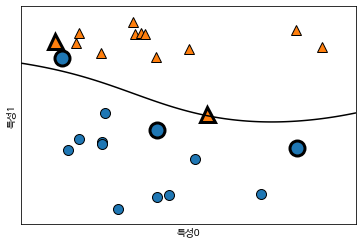

In [19]:
from sklearn.svm import SVC
# forge 데이터셋 사용
X, y = mglearn.tools.make_handcrafted_dataset()

# 서포트 벡터 머신
svm = SVC(kernel = 'rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)

# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:,0], X[:,1], y)

# 서포트 벡터
sv = svm.support_vectors_

# dual_coef_의 부호에 의해 서포트 벡터 클래스 레이블 결정됨
sv_labels = svm.dual_coef_.ravel() > 0
# 서포트 벡터 표시
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15, markeredgewidth=3)

plt.xlabel("특성0")
plt.ylabel("특성1")

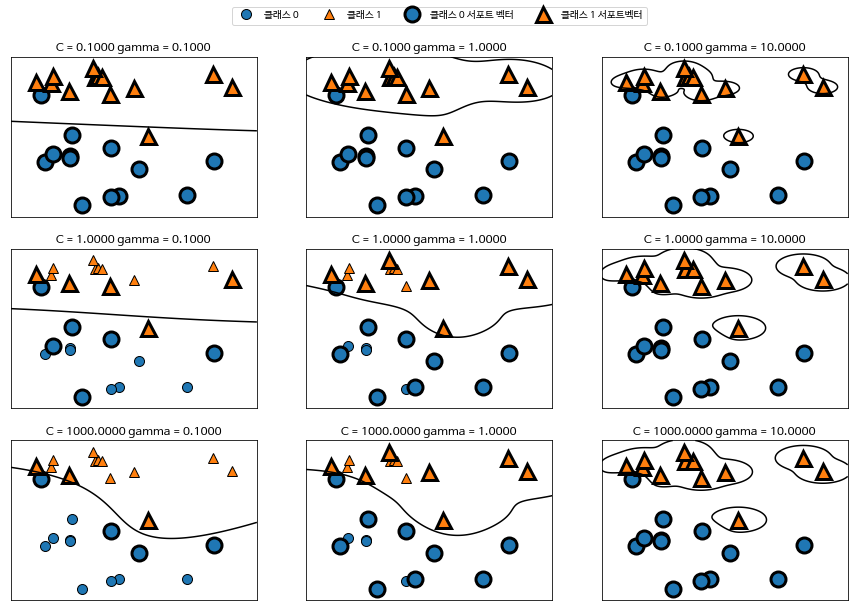

In [21]:
fig, axes = plt.subplots(3,3,figsize=(15,10))

for ax, C in zip(axes, [-1, 0, 3]):
  for a, gamma in zip(ax, range(-1,2)):
    mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0,0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트벡터"], ncol=4, loc=(.9,1.2))

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train,y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.94


Text(0, 0.5, '특성 크기')

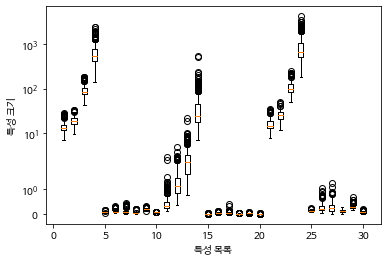

In [29]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

In [31]:
# 훈련 세트에서 특성별 최소값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최대-최소) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# (훈련데이터 - 최소) / 범위 <최소:0 최대:1>
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최솟값\n", X_train_scaled.min(axis=0))
print("특성별 최댓값\n", X_train_scaled.max(axis=0))


특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [33]:
# 테스트에도 동일하게
X_test_scaled = (X_test - min_on_training) / range_on_training

In [37]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.984
테스트 세트 정확도: 0.972


In [38]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958
